# Jane Street Puzzle - November 2024 - Beside the Point

## Problem Statement

<div class="center"><img src="images/november-2024 (1).png" style="background-color: white;" class="dark_img" alt=""></div>

Two random points, one red and one blue, are chosen uniformly and independently from the interior of a square. To ten decimal places, what is the probability that there exists a point on the side of the square closest to the blue point that is equidistant to both the blue point and the red point?

## Solution

In this solution, $B = (x_1, y_1)$ and $R = (x_2, y_2)$ denote the blue and red points respectively.

First, we note that we can exploit the symmetry of the problem. The probability in the area where $B$ is closer to an edge should be the same as the probability in another area where $B$ is closer to another edge. Each of these areas represent a triangle where an edge of the unit square is the base of the triangle and the two other edges connect a vertex to the center of the unit square. Also, we can further subdivide such a triangle into two right triangles with one vertex located at the midpoint of the base. The probability when $B$ is in any of those two right triangles should be the same. Therefore, we only need to compute the probability when $B$ is located in one of those right triangles and multiply by 8 (the total number of such triangles). Here, we will assume that $B$ falls into the area defined by $0 \leq x_1 \leq \frac{1}{2}$ and $0 \leq y_1 \leq x_1$ and the edge of the unit square we are interested in is the lower edge.

The points that are equidistant to two points must lie on the perpendicular bisector of the segement between those two points. Therefore, there exits a point equidistant to $R$ and $B$ on the lower edge of the unit square if and only if the perpendicular bisector crosses the $x$-axis between 0 and 1. The equation for this perpendicular bisector is the equation of the normal line to the $BR$ segment going through the the midpoint of the segment. The slope of the segment $BR$ is given by $m = \frac{y_2 - y_1}{x_2 - x_1}$ and the slope of the normal line is $-\frac{1}{m}$. As the normal line goes through the midpoint of $BR$ given by $\left ( \frac{x_1 + x_2}{2}, \frac{y_1 + y_2}{2}\right )$, the equation of the perpendicular bisector is given by

\begin{equation}
    y - \frac{y_1 + y_2}{2} = -\frac{x_2 - x_1}{y_2 - y_1} \left (x - \frac{x_1 + x_2}{2} \right ).
\end{equation}

For now, let's assume that $B$ is known and fix. We want to find the boundary of the region where $(x_2, y_2)$ is valid (there exists an equidistant point to $B$ and $R$ on the edge). To do so, we need to evaluate the equation above at the points $(0, 0)$ and $(1, 0)$. 

Setting $(x, y) = (0, 0)$, we obtain

\begin{equation}
    x_2^2 + y_2^2 = x_1^2 + y_1^2.
\end{equation}

Setting $(x, y) = (1, 0)$, we obtain

\begin{equation}
    x_2^2 + y_2^2 = (1 - x_1)^2 + y_1^2.
\end{equation}

These are the equations of two circles, $C_1$ and $C_2$ of radius $r_1 = \sqrt{x_1^2 + y_1^2}$ and $r_2 = \sqrt{(1 - x_1)^2 + y_1^2}$ and centred at $(0, 0)$ and $(1, 0)$ respectively. We note that these two circles intersect at the point $B$. The area we are interested in depends on the relative values of $x_1$ and $x_2$ and the relative values of $y_1$ and $y_2$ because positive/negative values will change the sign of the inequality (crossing above/below 0 and 1). Therefore, we can divide the area of the unit square into 4 subregions:

- $x_2 < x_1$ and $y_2 > y_1$: the area inside $C_1$ is the area where the crossing occurs between 0 and 1.
- $x_2 > x_1$ and $y_2 > y_1$: the area inside $C_2$ is the area where the crossing occurs between 0 and 1.
- $x_2 < x_1$ and $y_2 < y_1$: the area inside $C_2$ is the area where the crossing does not occur between 0 and 1.
- $x_2 > x_1$ and $y_2 < y_1$: the area inside $C_1$ is the area where the crossing does not occur between 0 and 1.

The plot at the end of this document can help visualise these scenarios.

Combining all these regions, we realise that the valid region is the sum of the areas of $C_1$ and $C_2$ minus twice their intersection (the intersection is accounted for twice when we sum the respective areas). Because we are only interested in the area within the unit square, we need only one quarter of the areas of $C_1$ and $C_2$ and we need to remove the intersection only once (half of twice the intersection). Let $A_1(x_1, y_1)$, $A_2(x_1, y_1)$ and $A_{1, 2}(x_1, y_1)$ represent the areas of $C_1$, $C_2$ and their intersection respectively.

We have

\begin{align}
    &A_1(x_1, y_1) = \pi r_1^2 = \pi (x_1^2 + y_1^2), \\
    &A_2(x_1, y_1) = \pi r_2^2 = \pi ((1 - x_1)^2 + y_1^2), \\
    &A_{1, 2}(x_1, y_1) = r_1^2 \cos^{-1} \left( \frac{d^2 + r_1^2 - r_2^2}{2dr_1} \right) + r_2^2 \cos^{-1} \left( \frac{d^2 + r_2^2 - r_1^2}{2dr_2} \right) - \frac{1}{2} \sqrt{(-d + r_1 + r_2)(d + r_1 - r_2)(d - r_1 + r_2)(d + r_1 + r_2)} 
\end{align}

where $d$ is the distance between the centres of the circles. In our case, $d = 1$.

Finally, we need to integrate and scale the result to account for the eight regions. Therefore, the solution to the problem, $p$, is given by

\begin{equation}
    p = 8 \int_0^{\frac{1}{2}} \int_0^{x_1} \frac{1}{4} (A_1(x_1, y_1) + A_2(x_1, y_1)) - A_{1, 2}(x_1, y_1) \,\, dy_1 dx_1.
\end{equation}

We obtain the result with numerical integration.

In [408]:
import numpy as np
from scipy.integrate import dblquad
import matplotlib.pyplot as plt


# Radius of C_1
def r1(x1, y1):
    return np.sqrt(x1**2 + y1**2)

# Radius of C_2
def r2(x1, y1):
    return np.sqrt((1 - x1)**2 + y1**2)

# Area of C_1 within unit square
def c1_area(x1, y1):
    return 1/4 * np.pi * r1(x1, y1)**2

# Area of C_2 within unit square
def c2_area(x1, y1):
    return 1/4 * np.pi * r2(x1, y1)**2

# Area of the intersection of C_1 and C_2
def intersection_area(x1, y1):
    r1_val = r1(x1, y1)
    r2_val = r2(x1, y1)
    distance = 1

    cos_arg1 = (distance**2 + r1_val**2 - r2_val**2) / (2 * distance * r1_val)
    cos_arg2 = (distance**2 + r2_val**2 - r1_val**2) / (2 * distance * r2_val)
    if cos_arg1 > 1 or cos_arg1 < -1 or cos_arg2 > 1 or cos_arg2 < -1:
        return 0

    term1 = (r1_val**2) * np.arccos(cos_arg1)
    term2 = (r2_val**2) * np.arccos(cos_arg2)
    term3 = 0.5 * np.sqrt((-distance + r1_val + r2_val) * (distance + r1_val - r2_val) * (distance - r1_val + r2_val) * (distance + r1_val + r2_val))
    return term1 + term2 - term3

# Total relevant area
def total_area(x1, y1):
    return c1_area(x1, y1) + c2_area(x1, y1) - intersection_area(x1, y1)

# Compute double integral
p, _= dblquad(lambda x, y: total_area(y, x), 0, 0.5, 0, lambda x: x)

print(f"The answer is {round(8 * p, 10)}")

The answer is 0.4914075788


## Visualisation

The plot below can help to visualise the circles for $B = (0.35, 0.2)$.

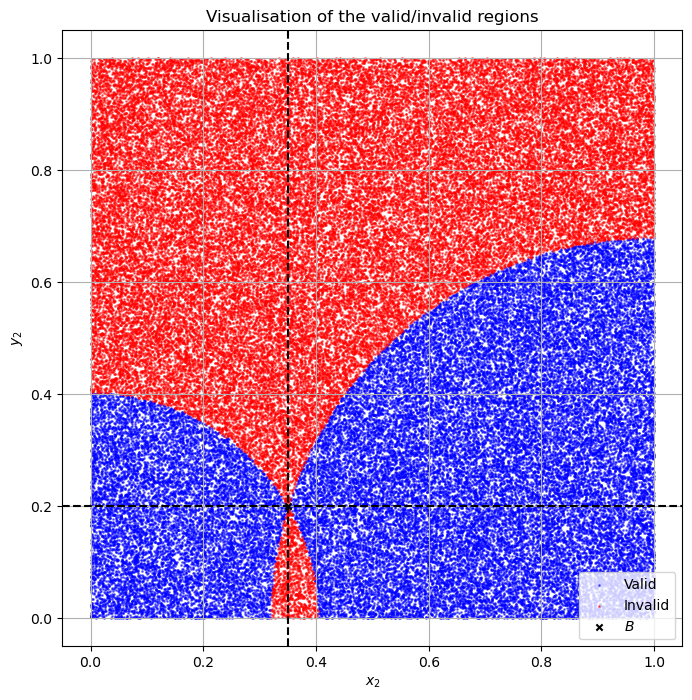

In [405]:
x1, y1 = 0.35, 0.2
num_points = 100000

# Generate random coordinates for the red point R within the unit square
x2 = np.random.uniform(0, 1, num_points)
y2 = np.random.uniform(0, 1, num_points)

# Calculate the x coordinate of the intersection of the perpendicular bisector with y=0
x_values = (x1 + x2) / 2 + ((y1 + y2) * (y2 - y1)) / (2 * (x2 - x1))
valid = (x_values >= 0) & (x_values <= 1)

# Plotting the results
plt.figure(figsize=(8, 8))
plt.scatter(x2[valid], y2[valid], color='blue', alpha=0.5, label='Valid', s=1)
plt.scatter(x2[~valid], y2[~valid], color='red', alpha=0.5, label='Invalid', s=1)
plt.scatter(x1, y1, marker='x', color='k', s=20, label=r'$B$')
plt.xlabel(r'$x_2$')
plt.ylabel(r'$y_2$')
plt.title(f'Visualisation of the valid/invalid regions')
plt.axvline(x=x1, color='k', linestyle='--')
plt.axhline(y=y1, color='k', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

# Monte Carlo

In order to increase the confidence in our result, we can run a Monte Carlo simulation and check if the estimated value is close to our previous answer.

In [407]:
num_points = 10000000
x1 = np.random.uniform(0, 1, num_points)
y1 = np.random.uniform(0, 1, num_points)
x2 = np.random.uniform(0, 1, num_points)
y2 = np.random.uniform(0, 1, num_points)

valid = (x1 <= 0.5) & (y1 < x1)
x1 = x1[valid]
y1 = y1[valid]
x2 = x2[valid]
y2 = y2[valid]
x_values = (x1 + x2) / 2 + ((y1 + y2) * (y2 - y1)) / (2 * (x2 - x1))
valid = (x_values >= 0) & (x_values <= 1)

p = (sum(valid) / len(valid))
p

0.49136652788063656